**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
import xgboost as xgb

**Load Data and Splitting**

In [99]:
df_train = pd.read_csv('/content/csv_result-abc.csv')

X = df_train.drop(['id', 'user_id'], axis=1)
Y = df_train['user_id']

df_test = pd.read_csv('/content/csv_test-abc.csv')

X_t = df_test.drop(['user_id'], axis=1)
Y_t = df_test['user_id']
#X = preprocessing(X)
# df_test = preprocessing(df_test)

# scaler = norm(X, df_test)

# X = scaler.transform(X)
# df_test = scaler.transform(df_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# X_train ,Y_train = X, Y
# X_test, Y_test = X_t ,Y_t

In [4]:
X.shape


(3076, 82)

In [5]:
X.head()


,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea15,meanholdtime,meanpressure,meanfingerarea,meanxaccelaration,meanyaccelaration,meanzaccelaration,velocity,totaltime,totaldistance
0,124,108,116,108,99,114,108,104,90,111,...,0.225806,105.800000,0.17536,0.311828,-0.031504,4.818670,8.516545,1.490264,3620,279.761043
1,98,84,138,98,137,88,129,102,102,119,...,0.193548,106.533333,0.18848,0.283871,0.119750,4.757049,8.554054,1.491208,3300,291.520559
2,109,100,146,103,121,116,119,135,95,116,...,0.258065,112.866667,0.18624,0.303226,-0.042058,5.021319,8.402710,1.663382,3092,277.760978
3,107,111,105,121,124,105,108,123,93,100,...,0.322581,105.133333,0.17088,0.286021,0.201093,4.363981,8.755256,1.656566,3083,284.164433
4,107,100,150,122,107,121,105,111,87,79,...,0.290323,104.133333,0.21696,0.324731,-0.043295,4.617557,8.632713,1.851511,2890,281.438533


In [29]:
clf = RandomForestClassifier()
y_predict = clf.fit(X_train, Y_train).predict(X_test)
clf.score(X_test, Y_test)
print(classification_report(Y_test, y_predict))
print(confusion_matrix(Y_test, y_predict))

              precision    recall  f1-score   support

         100       1.00      0.68      0.81        19
         101       1.00      0.81      0.90        16
         102       1.00      1.00      1.00        15
         103       1.00      0.86      0.92        14
         104       0.91      1.00      0.95        10
         105       1.00      1.00      1.00        24
         200       1.00      0.90      0.95        10
         201       0.81      1.00      0.90        13
         202       1.00      0.90      0.95        10
         203       0.89      0.80      0.84        10
         300       1.00      1.00      1.00        17
         301       1.00      0.79      0.88        14
         302       0.92      1.00      0.96        11
         303       0.73      1.00      0.85        11
         400       0.79      0.92      0.85        12
         401       0.82      1.00      0.90         9
         402       1.00      1.00      1.00        16
         403       0.80    

**Modelling Random Forest**

**Visualizations Random Forest**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


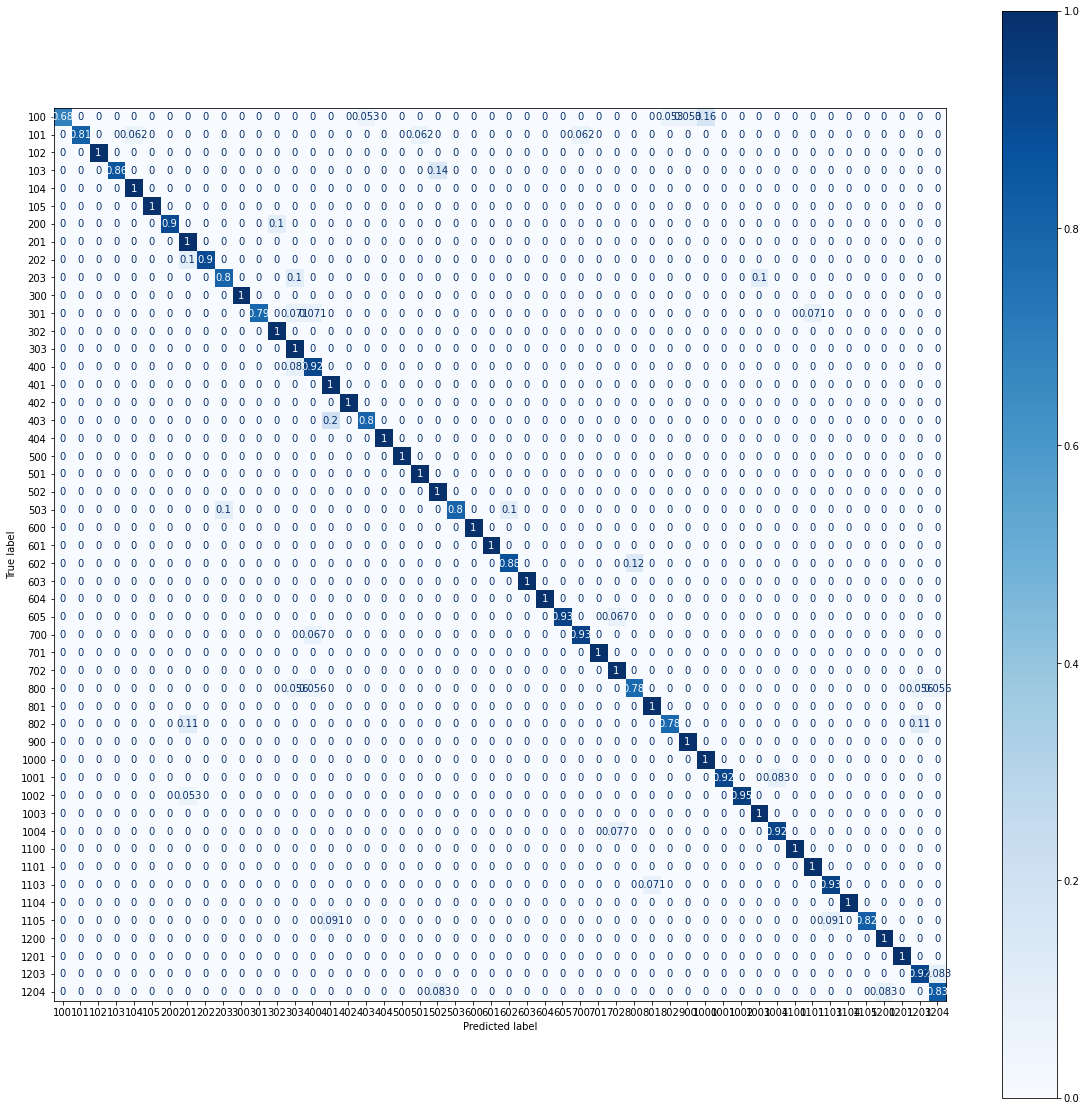

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(clf, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [31]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
import seaborn as sns
%matplotlib inline
# Creating a bar plot
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

ValueError: ignored

**Modelling XGBoost**

In [32]:
pip install xgboost

In [33]:
pip install graphviz

In [34]:
from xgboost import XGBClassifier
model = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                alpha = 10)
y_predict = model.fit(X_train, Y_train).predict(X_test)
model.score(X_test, Y_test)
print(classification_report(Y_test, y_predict))
print(confusion_matrix(Y_test, y_predict))

              precision    recall  f1-score   support

         100       0.94      0.84      0.89        19
         101       1.00      0.94      0.97        16
         102       1.00      1.00      1.00        15
         103       0.86      0.86      0.86        14
         104       1.00      0.90      0.95        10
         105       1.00      0.92      0.96        24
         200       1.00      1.00      1.00        10
         201       0.93      1.00      0.96        13
         202       1.00      0.90      0.95        10
         203       0.89      0.80      0.84        10
         300       1.00      1.00      1.00        17
         301       0.91      0.71      0.80        14
         302       0.92      1.00      0.96        11
         303       0.79      1.00      0.88        11
         400       0.85      0.92      0.88        12
         401       1.00      1.00      1.00         9
         402       0.94      1.00      0.97        16
         403       0.83    

**Visualizations XGBoost**

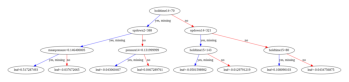

In [35]:
xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

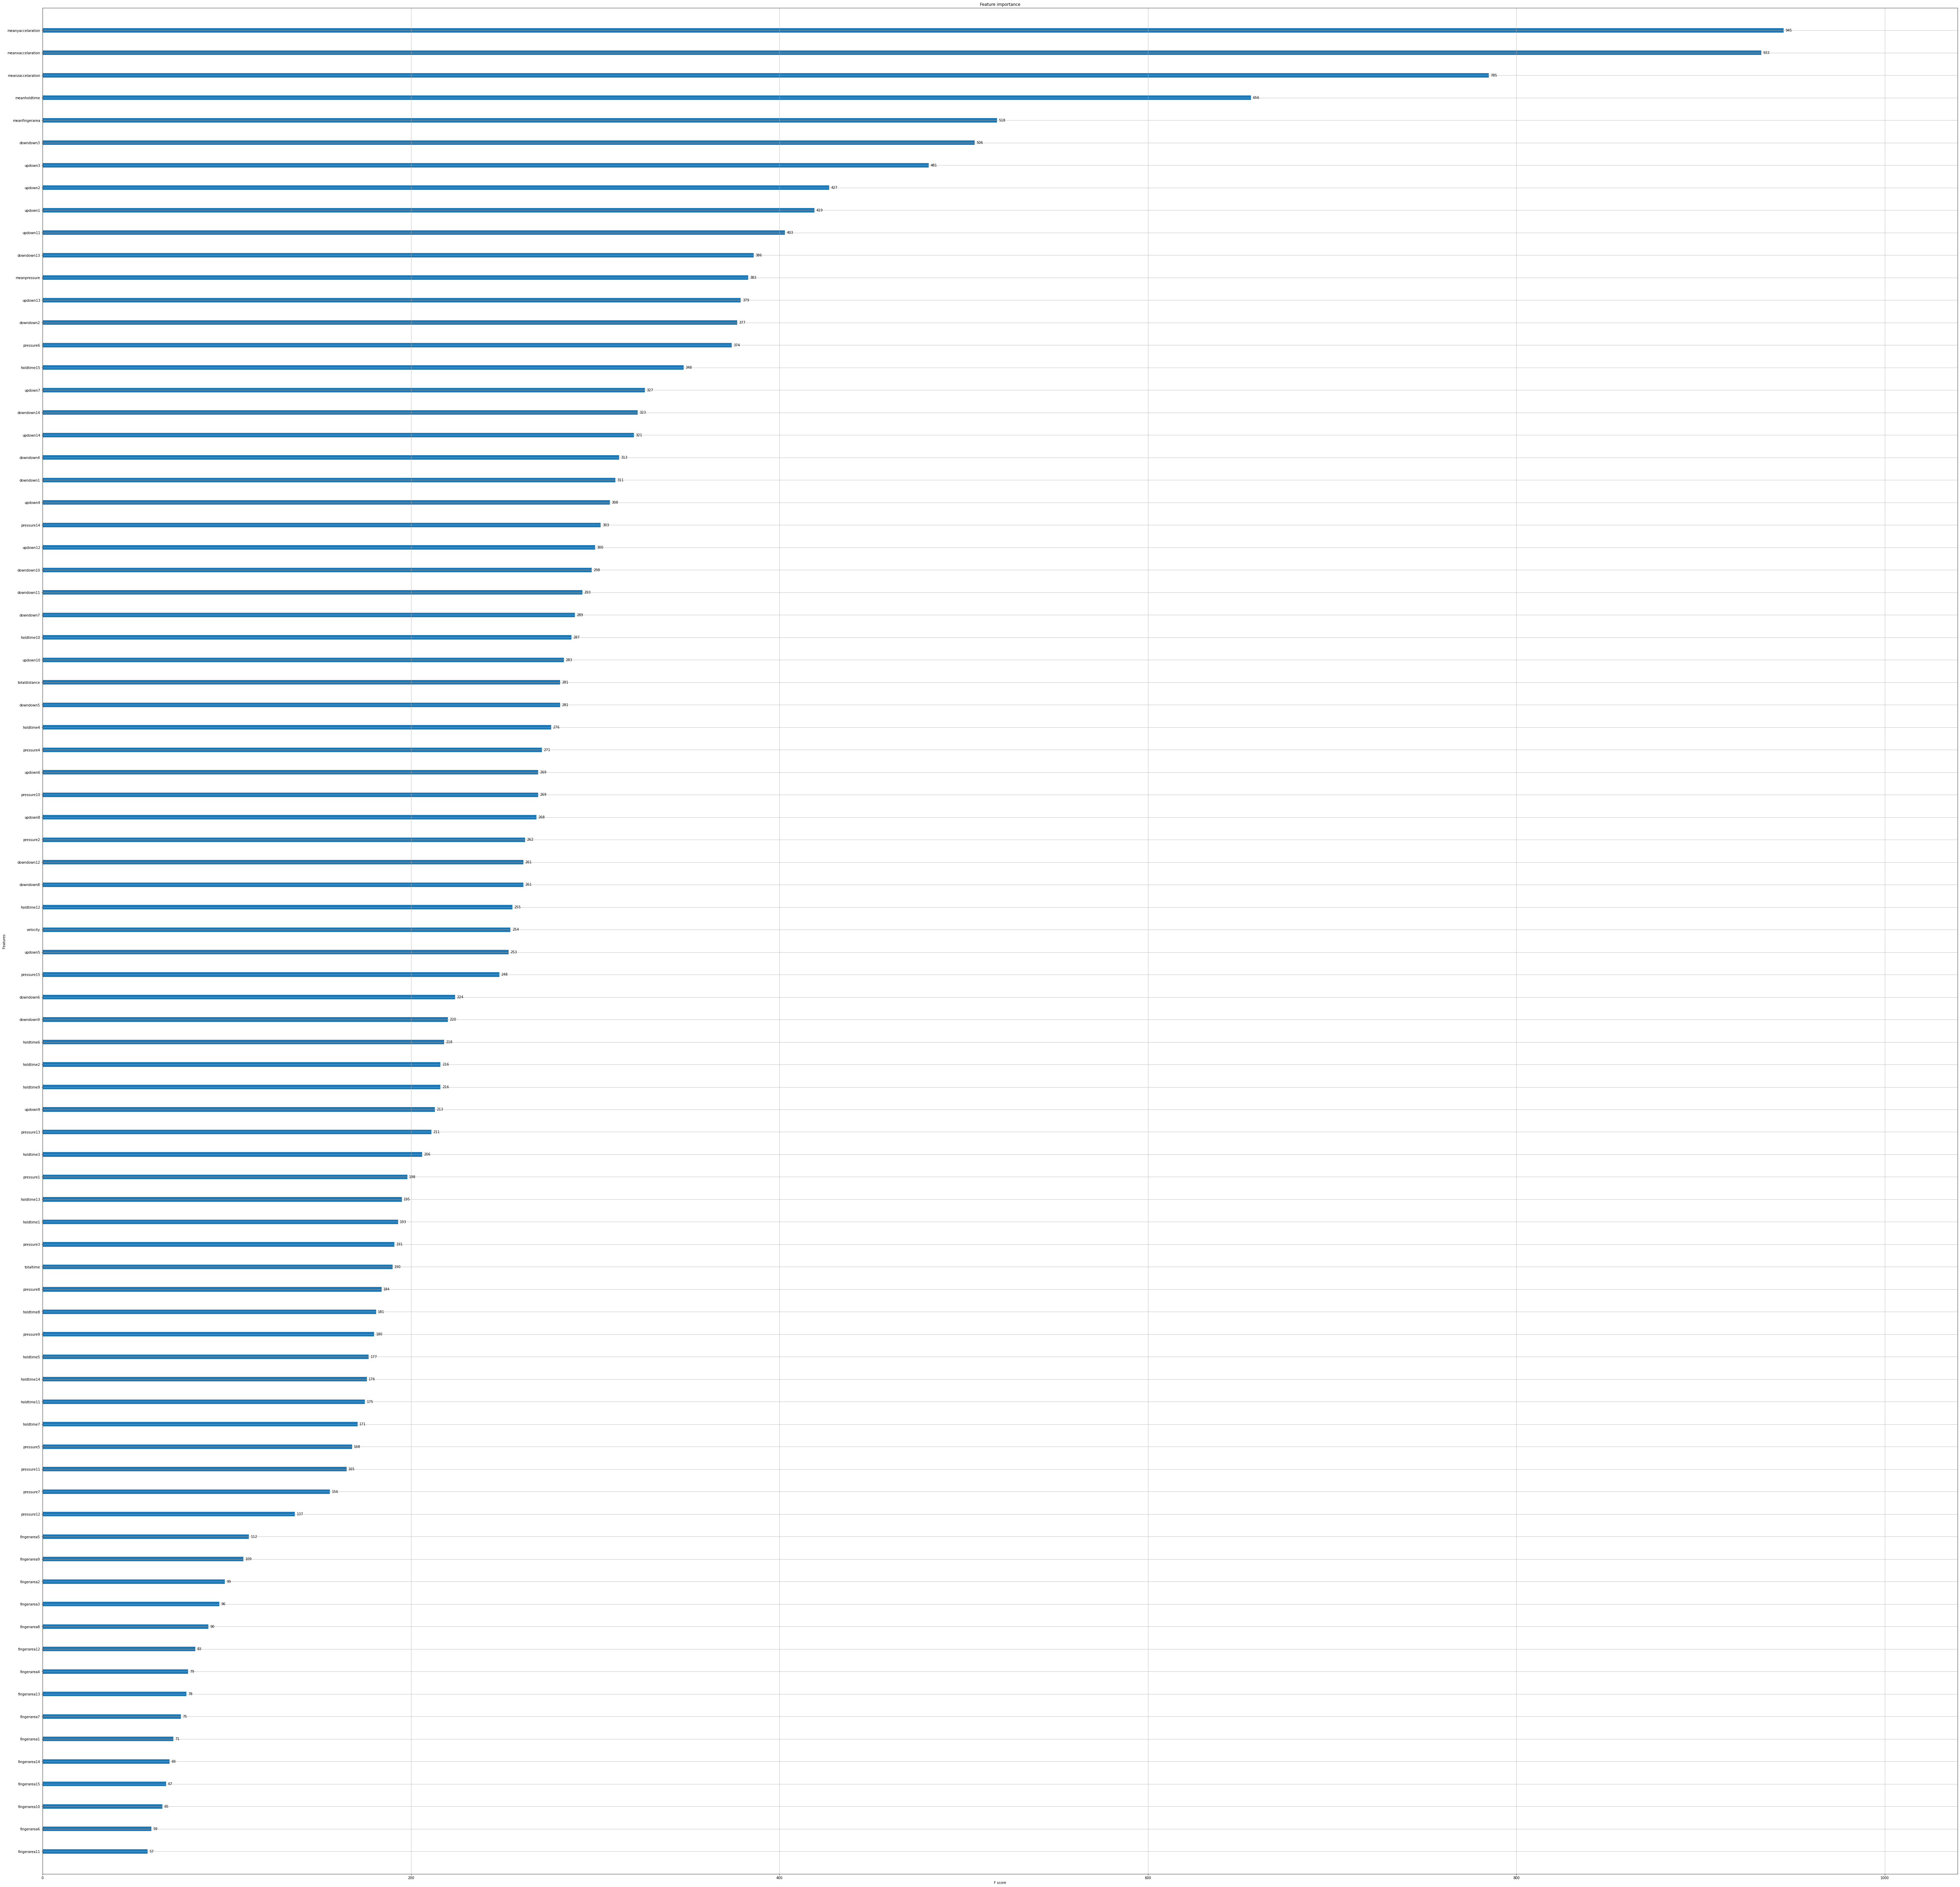

In [36]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


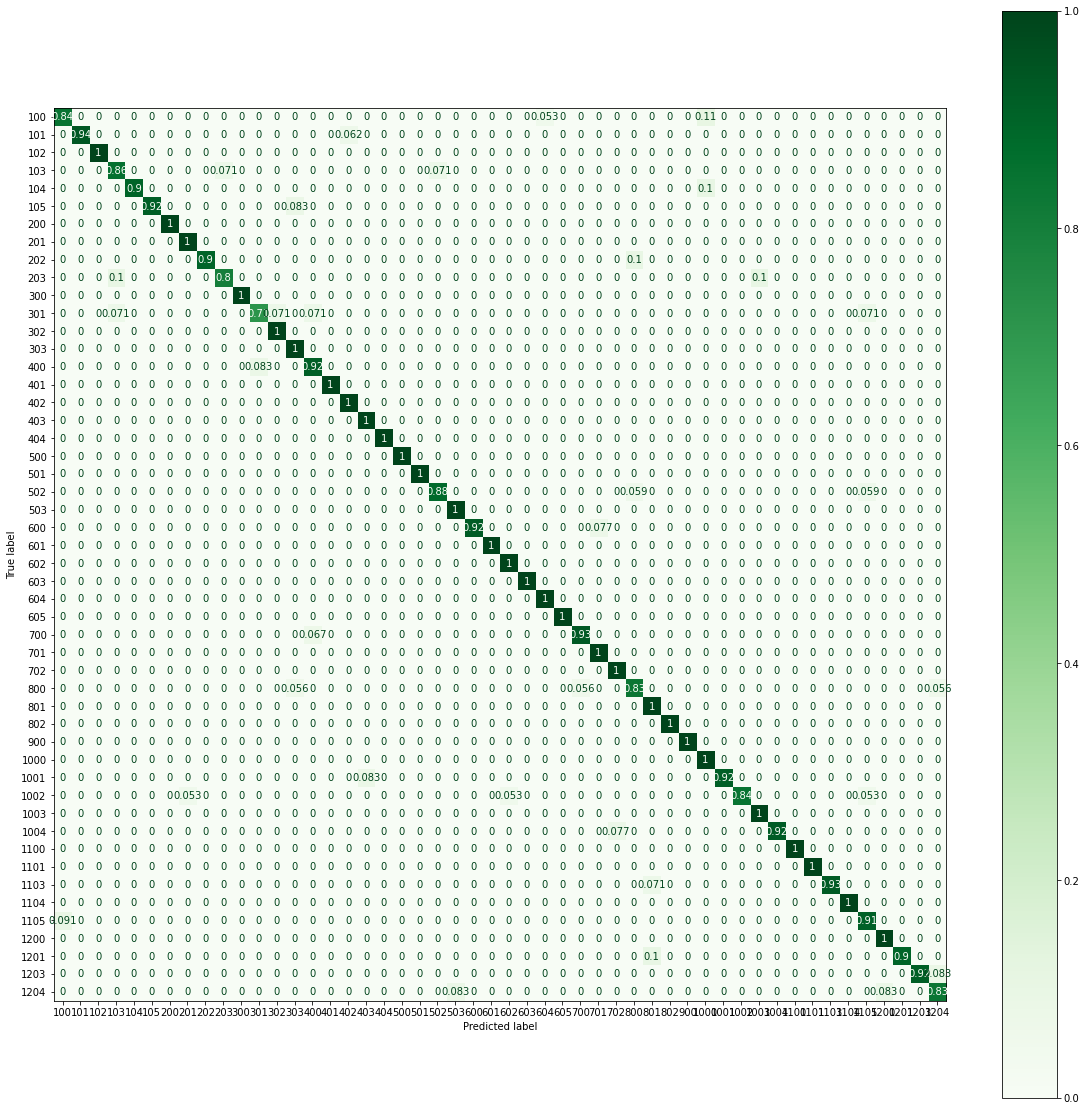

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, X_test, Y_test, normalize='true', cmap=plt.cm.Greens, ax=ax)
plt.show()

**===> *Pickle* Random Forest Classifier**

In [38]:
import pickle as pickle
pickle.dump(clf, open("RF.sav", 'wb'))

In [39]:
X['Agg_Column'] = X_t[""+X_t.columns[:]].apply(lambda x: ';'.join(x.dropna().astype(str)),axis=1)
df_X = pd.DataFrame(X)
df_X.to_csv('output_data.csv', index=False, header=False)


In [41]:
# r = list(set(Y))
# r[:3]
# data51 = df_train[df_train.user_id != r[0] ]
# data51 = data51[df_train.user_id != r[1] ]
# data51= data51[df_train.user_id != r[2] ]
# data51.shape
# X51= data51.drop(data51.user_id)
# y51 = data51.user_id

# lose = df_train[df_train.user_id == r[0] ]
# lose = lose.append(df_train[df_train.user_id == r[1] ])
# lose = lose.append(df_train[df_train.user_id == r[2] ])
# lose.shape
# y_lose = lose.user_id


In [110]:
clf = RandomForestClassifier()
y_predict = clf.fit(X_train, Y_train).predict(X_test)
clf.score(X_test, Y_test)
print(classification_report(Y_test, y_predict))
print(confusion_matrix(Y_test, y_predict))


              precision    recall  f1-score   support

         100       1.00      0.68      0.81        19
         101       1.00      0.88      0.93        16
         102       1.00      1.00      1.00        15
         103       1.00      0.86      0.92        14
         104       1.00      1.00      1.00        10
         105       1.00      1.00      1.00        24
         200       0.91      1.00      0.95        10
         201       0.87      1.00      0.93        13
         202       0.89      0.80      0.84        10
         203       1.00      0.80      0.89        10
         300       1.00      1.00      1.00        17
         301       1.00      0.93      0.96        14
         302       1.00      1.00      1.00        11
         303       0.83      0.91      0.87        11
         400       0.79      0.92      0.85        12
         401       0.75      1.00      0.86         9
         402       1.00      1.00      1.00        16
         403       0.57    

In [111]:
new_t = []
for val in Y_t:
  if (val == 302 or val == 600 or val == 303):
    new_t.append(val)
  else :
    new_t.append(0)


In [113]:
#test_x ,new_t
indexs =np.sort(list(set(Y_train)))
prob =clf.predict_proba(test_x)
predict_unkown =[]
known=[]
unknown =[]
for i,val in enumerate(prob):
  max_value = max(val)
  index = indexs[np.argmax(val)]
  if(max_value>0.28):
    known.append(index)
    predict_unkown.append(index)
  else:
    unknown.append([max_value, index,i] )
    predict_unkown.append(0)
predict_unkown =np.array(predict_unkown)
#prediction

 the acuracy of the model on test data =  0.867231638418079
the confusion matrix of test data
[[201   1   0   0   0   1   7  11  26]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0  20   0   0   0   0   0   0]
 [  0   0   0  39   0   0   0   0   0]
 [  1   0   0   0  47   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


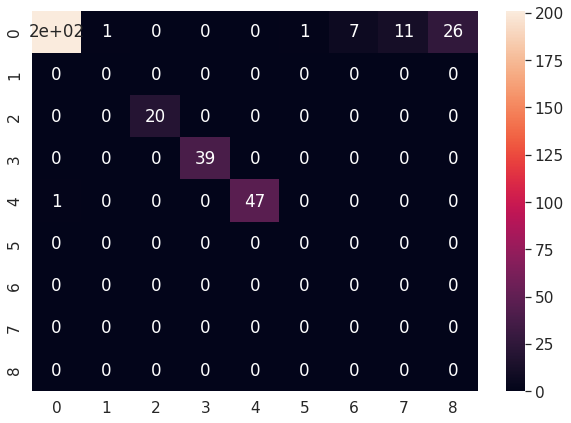

In [115]:

import seaborn as sn
acc = accuracy_score(new_t, predict_unkown)
print(" the acuracy of the model on test data = " , acc )
cf_mx = confusion_matrix(new_t, predict_unkown)
print("the confusion matrix of test data" )
print(cf_mx)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(cf_mx, annot=True)

In [116]:
#1   0   0   0   1   7  11  26


In [117]:
indexs =np.sort(list(set(Y_train)))
prob =clf.predict_proba(X_test)
prediction =[]
known=[]
unknown =[]
for i,val in enumerate(prob):
  max_value = max(val)
  index = indexs[np.argmax(val)]
  if(max_value>0.28):
    known.append(index)
    prediction.append(index)
  else:
    unknown.append([max_value, index,i] )
    prediction.append(0)
#prediction

 the acuracy of the model on test data =  0.8262987012987013
the confusion matrix of test data


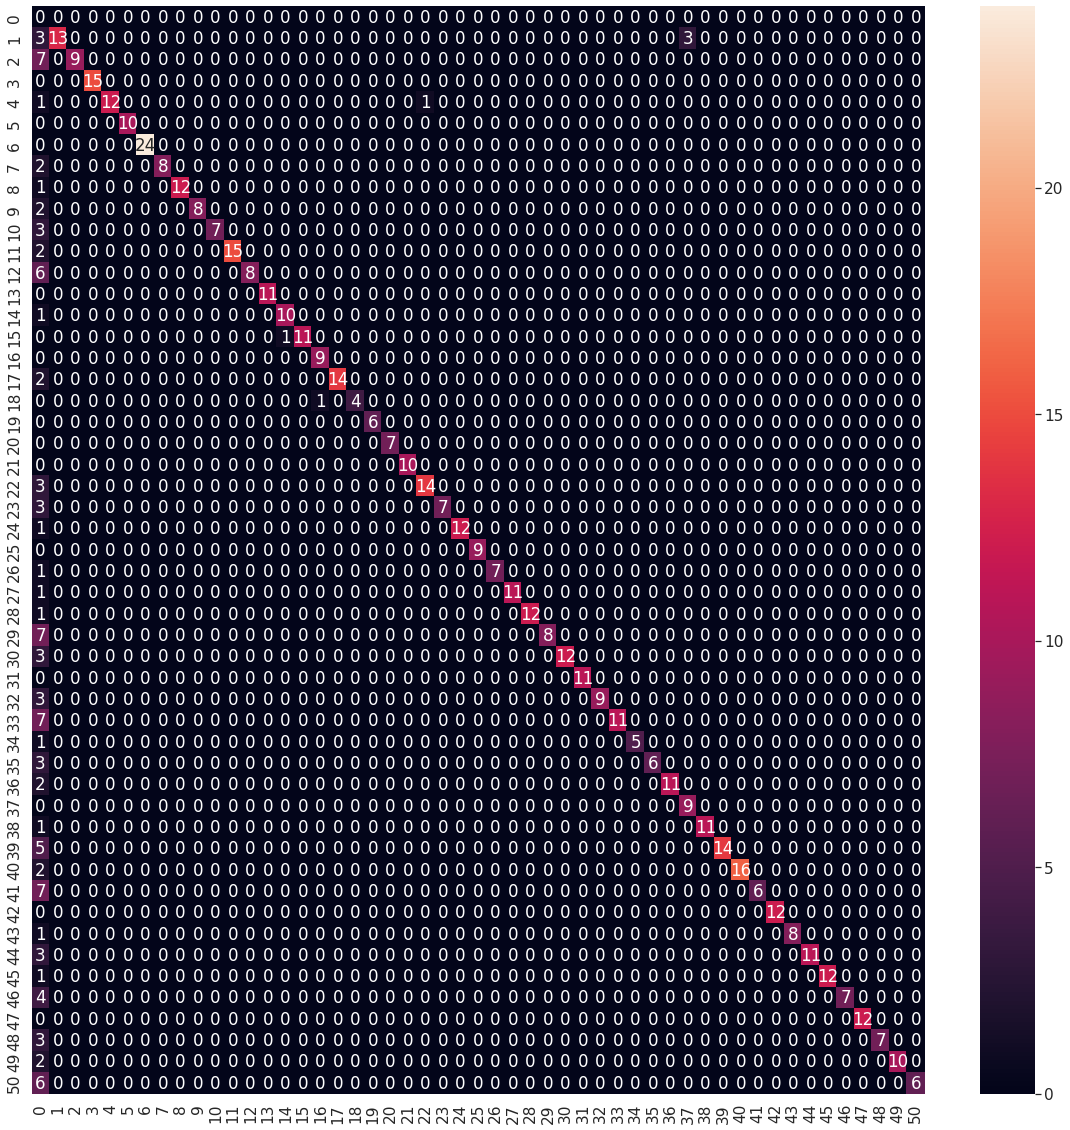

In [119]:
import seaborn as sn
acc = accuracy_score(Y_test, prediction)
print(" the acuracy of the model on test data = " , acc )
cf_mx = confusion_matrix(Y_test, prediction)
print("the confusion matrix of test data" )
plt.figure(figsize = (20,20))
sn.set(font_scale=1.4)
sn.heatmap(cf_mx, annot=True)